In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

matplotlib.rcParams['figure.figsize'] = [10,5]
, 
data = pd.read_csv('C:\\Users\Patrice\Desktop\\Min_Wage.csv', 
                   encoding = 'utf-8', index_col = 0)
data.index = pd.to_datetime(data.index, format = '%Y').year

max_wage = 'High.Value'
min_wage = 'Low.Value'
CPI_Av = 'CPI.Average'
max_18 = 'High.2018'
min_18 = 'Low.2018'
s = 'State'

#dt = data.loc[(data['State'] == 'Alaska')]
#dt.index = pd.to_datetime(dt.index, format = '%Y').year

gb = data.groupby('State')
gb.get_group("Alabama").head()

,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,
1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [2]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

act_min_wage = pd.DataFrame()

matplotlib.rcParams['figure.figsize'] = [10,5]

for name, group in data.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group[["Low.2018"]].rename(columns = {'Low.2018':name})
    else:
        act_min_wage = act_min_wage.join(group[['Low.2018']].rename(columns = {'Low.2018':name}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [3]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [4]:
act_min_wage.corr()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617
Colorado,NaN,-0.129332,0.742527,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,...,NaN,0.350796,-0.791134,0.622330,0.448485,0.210271,0.612637,0.533623,0.011501,0.130053
Connecticut,NaN,0.680886,0.458163,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,...,NaN,0.049405,-0.446165,0.302538,0.898469,-0.310705,0.715691,0.400099,0.585790,0.814971
Delaware,NaN,0.258997,0.429836,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,...,NaN,0.374150,-0.688552,0.501815,0.487378,-0.167700,0.830850,0.436045,0.071042,0.502713
District of Columbia,NaN,0.321785,0.590848,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,...,NaN,0.251189,-0.693560,0.537581,0.718686,0.007414,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),NaN,0.637679,-0.049914,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,...,NaN,-0.183950,0.475240,0.221539,0.504419,-0.105622,0.075067,0.272645,0.870658,0.328639


In [5]:
data.head()

,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,
1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [6]:
issue_data = data.loc[(data['Low.2018'] == 0)]
issue_data.head()

,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,
1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [7]:
issue_data['State'].unique

<bound method Series.unique of Year
1968           Alabama
1968           Florida
1968           Georgia
1968          Illinois
1968              Iowa
1968            Kansas
1968         Louisiana
1968       Mississippi
1968          Missouri
1968           Montana
1968    South Carolina
1968         Tennessee
1968             Texas
1968          Virginia
1969           Alabama
1969           Florida
1969           Georgia
1969          Illinois
1969              Iowa
1969            Kansas
1969         Louisiana
1969       Mississippi
1969          Missouri
1969           Montana
1969    South Carolina
1969         Tennessee
1969             Texas
1969          Virginia
1970           Alabama
1970           Florida
             ...      
2012           Alabama
2012         Louisiana
2012       Mississippi
2012    South Carolina
2012         Tennessee
2013           Alabama
2013         Louisiana
2013       Mississippi
2013    South Carolina
2013         Tennessee
2014           Alabam

In [15]:
import numpy as np
#axis = 1 means we're removing all columns with NaN values, if axis = 0, we'd be
#removing rows
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [9]:
for problem in issue_data['State'].unique():
    if problem in min_wage_corr.columns:
        print('we\'re missing something here')

In [11]:
grouped_issues = issue_data.groupby("State")

grouped_issues.get_group("Alabama")['Low.2018'].sum()

0.0

In [12]:
for state, data in grouped_issues:
    if data['Low.2018'].sum() != 0.0:
        print("we missed something")

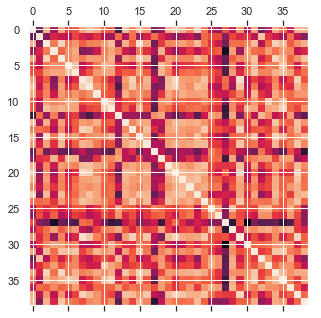

In [16]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

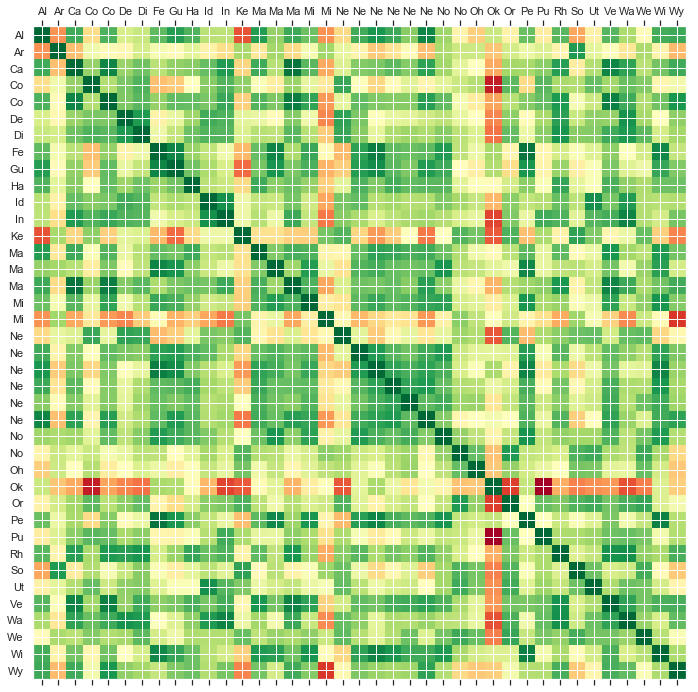

In [23]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [25]:
import pandas as pd

dfs = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [27]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [29]:
state_abbv.to_csv("C:\\Users\Patrice\Desktop\\state_abbv.csv")

In [48]:
dfs = pd.read_csv("C:\\Users\Patrice\Desktop\\state_abbv.csv", index_col = 'State/District')
abbv_dict = dfs.to_dict()

abbv_dict = abbv_dict['Postal Code']
print(abbv_dict)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [ ]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]